In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df =pd.read_csv('./data/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
del df['Id']

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


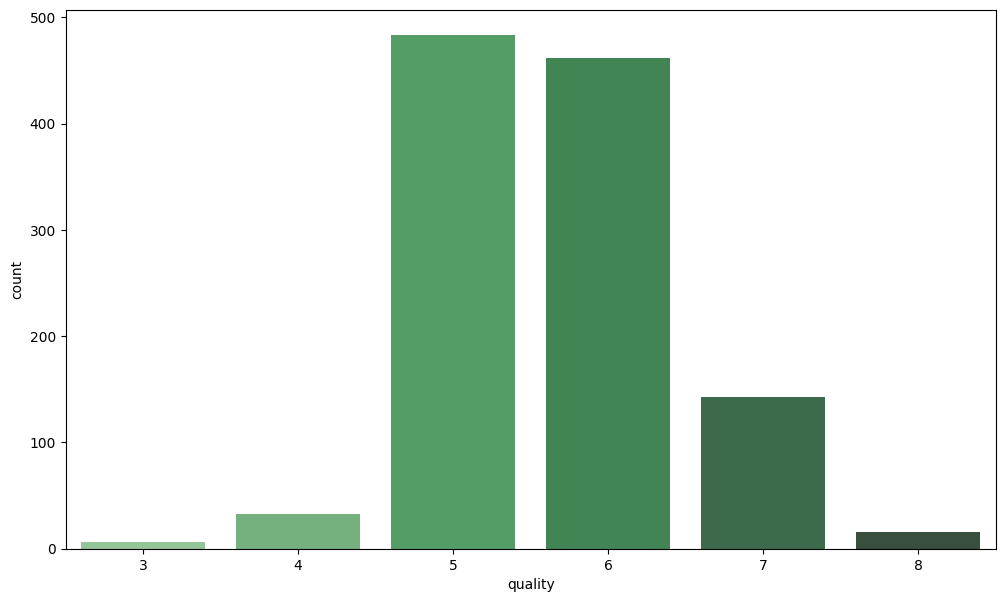

In [6]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=df,palette='Greens_d')
plt.show()

In [7]:
df.corr() #.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


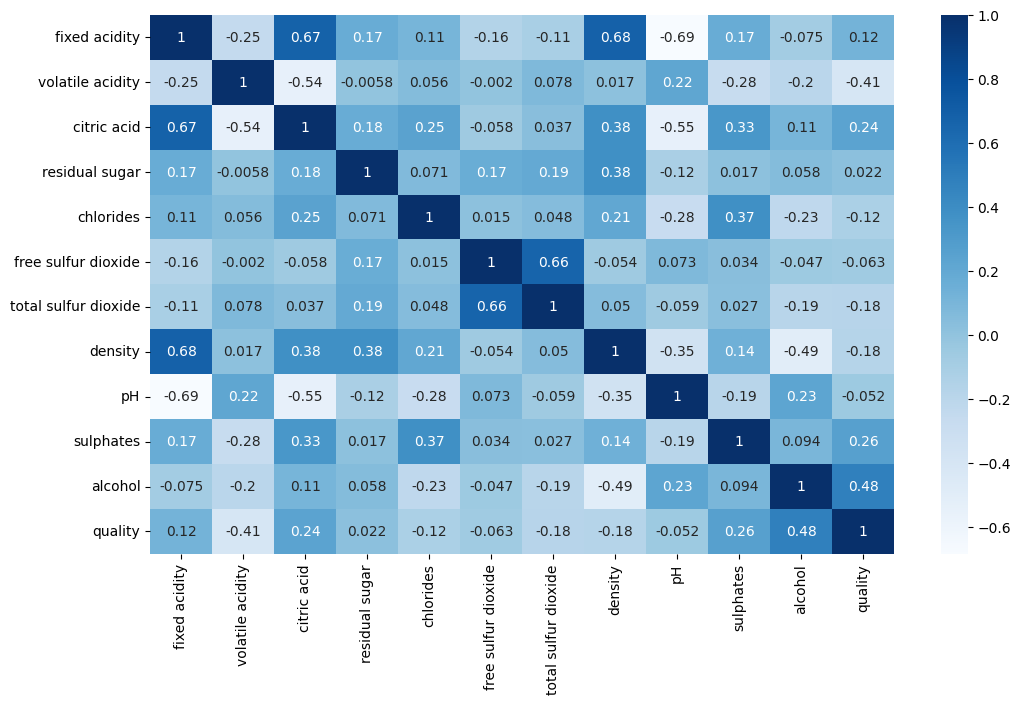

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

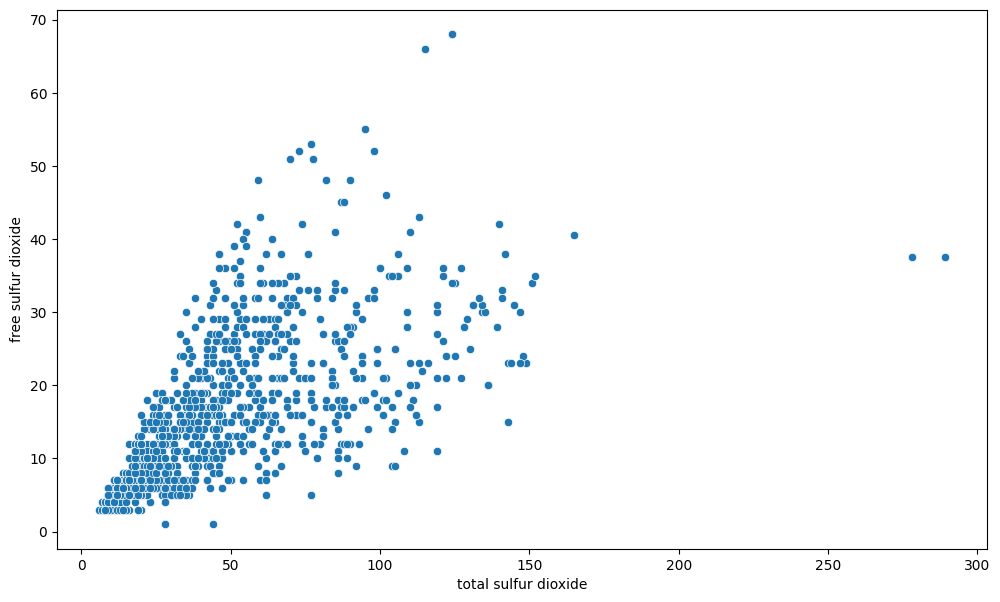

In [12]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

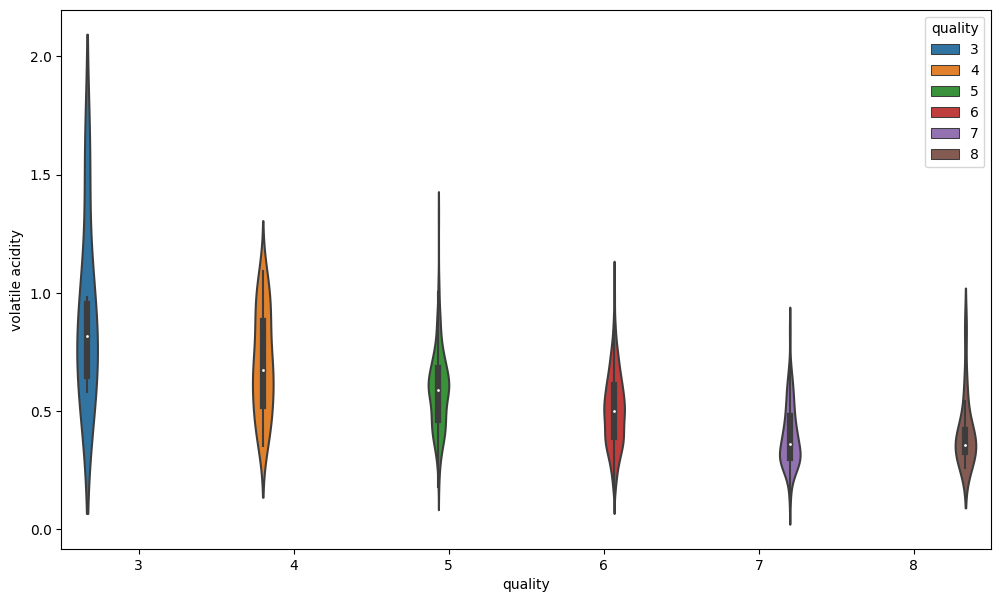

In [13]:
plt.figure(figsize=(12,7))
sns.violinplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

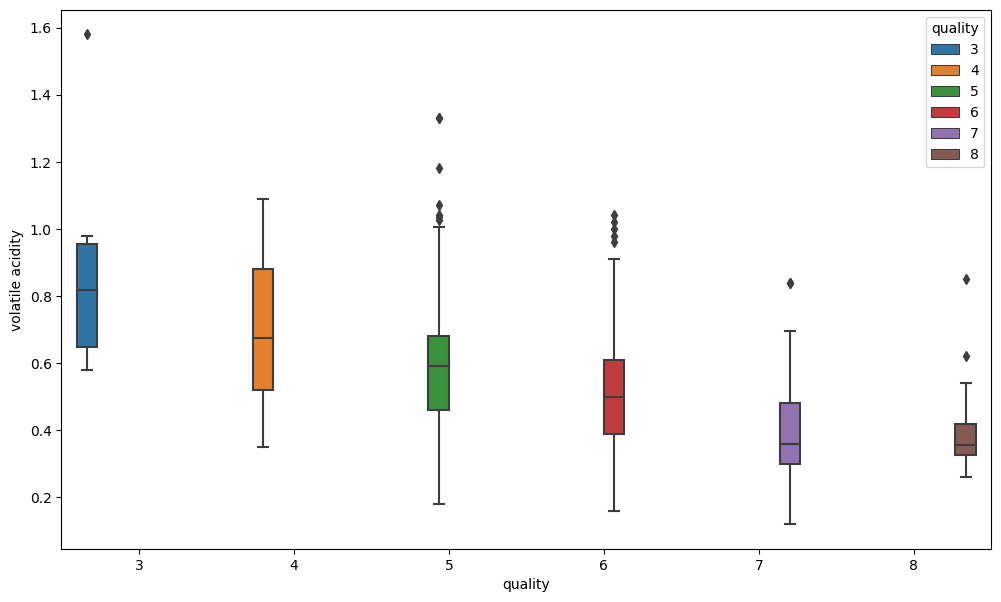

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

<Axes: xlabel='density', ylabel='fixed acidity'>

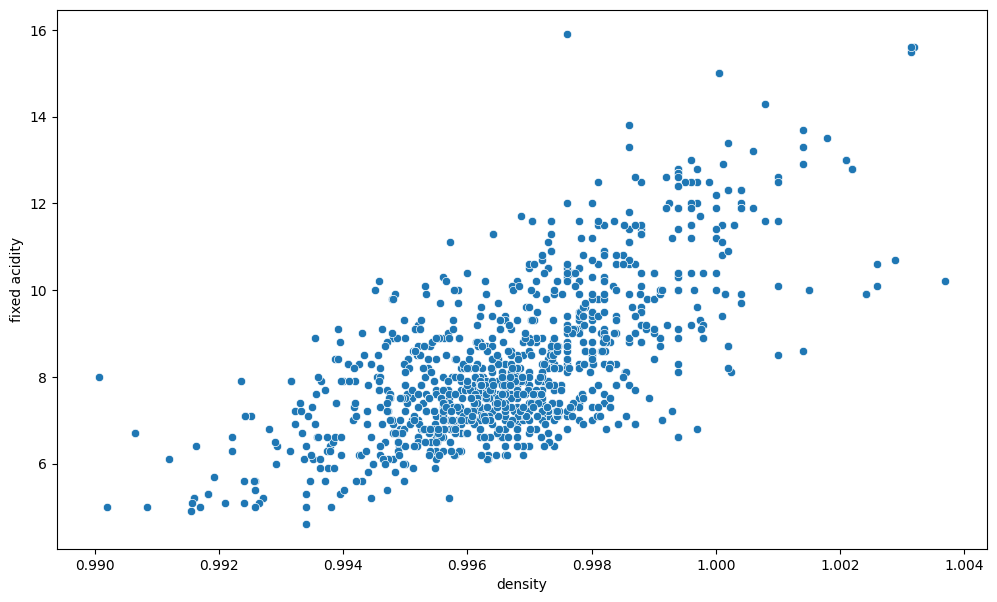

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

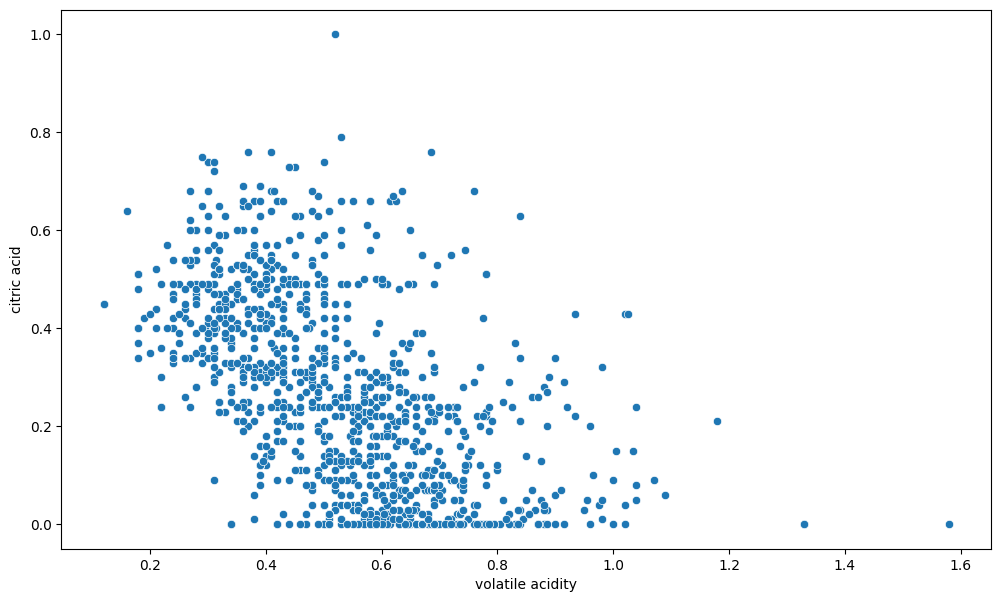

In [16]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

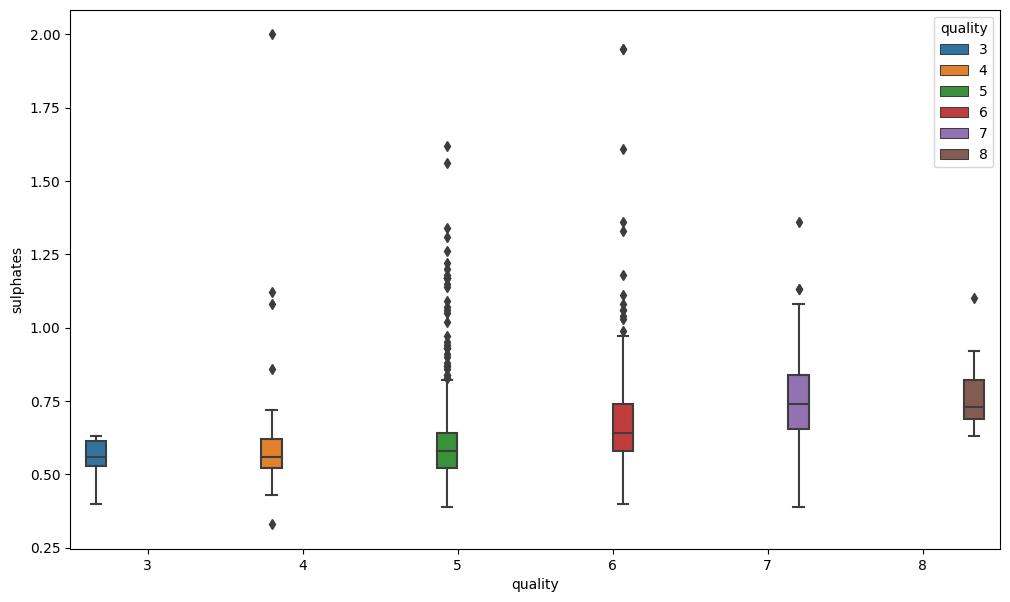

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

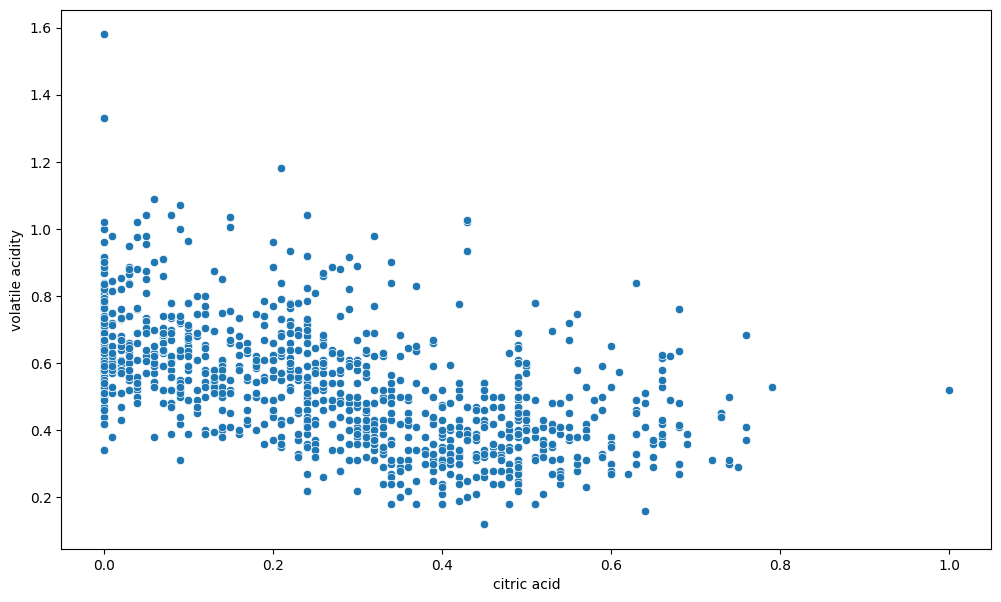

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

In [19]:
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.522711,0.336290,0.268364,0.163365,0.142279,0.229639,0.158874,0.993066,0.825689,0.328854,0.700813,5.657043
std,0.109912,0.113692,0.196686,0.087479,0.077361,0.150742,0.113433,0.001918,0.039068,0.085199,0.072631,0.805824
min,0.289308,0.075949,0.000000,0.058065,0.019640,0.014706,0.020761,0.986430,0.683292,0.165000,0.563758,3.000000
25%,0.446541,0.248418,0.090000,0.122581,0.114566,0.102941,0.072664,0.991910,0.799252,0.275000,0.637584,5.000000
50%,0.496855,0.329114,0.250000,0.141935,0.129296,0.191176,0.128028,0.993016,0.825436,0.310000,0.684564,6.000000
75%,0.572327,0.405063,0.420000,0.167742,0.147300,0.308824,0.211073,0.994176,0.847880,0.365000,0.744966,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [21]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)

In [23]:
model_comp={}

In [24]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.6375545851528385
0.5818306114188381
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.82      0.75       100
           6       0.58      0.70      0.63        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.21      0.25      0.23       229
weighted avg       0.54      0.64      0.58       229



/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

In [25]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.5720524017467249
0.5744444654488323
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.66      0.65      0.66       100
           6       0.55      0.58      0.56        92
           7       0.52      0.44      0.48        27
           8       1.00      0.50      0.67         2

    accuracy                           0.57       229
   macro avg       0.46      0.36      0.39       229
weighted avg       0.58      0.57      0.57       229



/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [26]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.6899563318777293
0.6729591516931045
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.79      0.76       100
           6       0.65      0.70      0.67        92
           7       0.68      0.56      0.61        27
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.34      0.34      0.34       229
weighted avg       0.66      0.69      0.67       229



/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [27]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.5589519650655022
0.5395476430410928
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.69      0.66       100
           6       0.51      0.58      0.54        92
           7       0.33      0.22      0.27        27
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.25      0.25      0.25       229
weighted avg       0.53      0.56      0.54       229



/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [28]:
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

0.6637554585152838
0.6069291484469779
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.81      0.77       100
           6       0.60      0.77      0.68        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.22      0.26      0.24       229
weighted avg       0.56      0.66      0.61       229



/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dortiz/opt/anaconda3/envs/skl_projects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [29]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
KNN,0.558952,0.539548
decision tree,0.572052,0.574444
logistic regression,0.637555,0.581831
svc,0.663755,0.606929
Random forest,0.689956,0.672959
